Hay que subir el archivo `prueba-transcriptos-01.txt` cada vez que se abre el documento porque colab lo borra.

Abrir el command pallete Ctrl + Shift + P / Tools -> Command Pallete, **Show file browser**

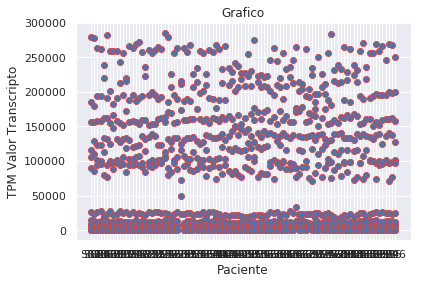

In [0]:
# !cat 001-scatter.py
import matplotlib.pyplot as plt
import pandas as pd

#Grafico Scatter es un Grafico de Dispersion.

datos = pd.read_csv('prueba-transcriptos-01.txt', delimiter="\t")
datos.columns = ["sampleID", "add1", "transcript", "add2", "TPM", "add3"]
# print (datos)

paciente = datos['sampleID']
add2 = datos['add2']
tpm = datos['TPM']
add3 = datos['add3']

plt.scatter(paciente, tpm, edgecolors='r')
#plt.scatter(paciente, add2, tpm, add3, edgecolors='r')
#plt.scatter(paciente, add2, add3, edgecolors='r')
plt.xlabel('Paciente')
plt.ylabel('TPM Valor Transcripto')
plt.title('Grafico')
plt.show()

# Sección nueva

# Sección nueva

# Análisis x sasha

Primero veo que variables tengo y que tipo de datos tiene cada una.

In [0]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236 entries, 0 to 1235
Data columns (total 6 columns):
sampleID      1236 non-null object
add1          1236 non-null int64
transcript    1236 non-null object
add2          1236 non-null float64
TPM           1230 non-null float64
add3          1236 non-null int64
dtypes: float64(2), int64(2), object(2)
memory usage: 58.0+ KB


In [0]:
datos.head(25)

,sampleID,add1,transcript,add2,TPM,add3
0,S01,1,chr2_uc002rvz.4,1.0,157157.03,4
1,S01,1,chr2_uc002rvy.2,2.0,26983.21,4
2,S01,1,chr2_uc010fbh.1,3.0,6902.84,4
3,S01,1,chr11_uc009yxr.1,4.0,116319.04,1
4,S01,1,chr11_uc001pkb.1,5.0,5799.09,1
5,S01,1,chr11_uc001pkc.1,6.0,90011.22,1
6,S01,1,chr11_uc001pkf.3,7.0,9798.20,1
7,S01,1,chr11_uc001pkd.4,8.0,403.22,1
8,S01,1,chr13_uc001uub.1,9.0,185431.89,3
9,S01,1,chr16_uc002dlx.1,10.0,279214.06,5


A primera vista, parece que *sampleId* y *add1* indexan la muestra.
*add2* indexa el orden de cada muestra dentro de los grupos de *add1*

Chequeo la variable *transcript* para ver cuantos valores distintos hay y cuantas veces aparece.

    Veo que hay pocas categorias y hay 2 categorias con muy pocas cuentas.

In [0]:
datos['transcript'].value_counts()

chr13_uc001uub.1    96
chr11_uc001pkc.1    96
chr2_uc002rvy.2     96
chr2_uc002rvz.4     96
chr17_uc002ict.3    96
chr16_uc002dlx.1    96
chr11_uc009yxr.1    96
chr17_uc010who.3    96
chr11_uc001pkf.3    94
chr2_uc010fbh.1     94
chr11_uc001pkb.1    94
chr17_uc010cyz.2    93
chr11_uc001pkd.4    87
chr17_uc010whp.2     5
chr11_uc001pkg.1     1
Name: transcript, dtype: int64

Dado que ya se que *transcript* es categorica, veo como se relaciona con las otras variables.

Text(0.5, 0, 'TPM Valor Transcripto')

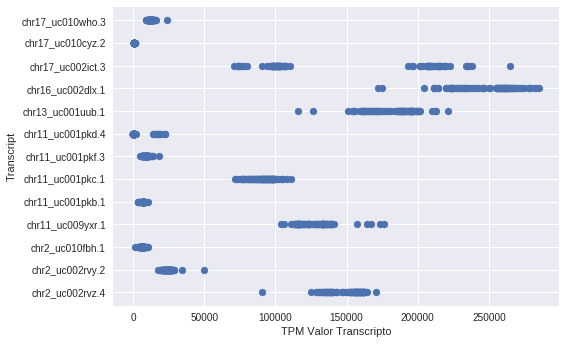

In [0]:
plt.scatter(datos['TPM'],datos['transcript'])
plt.ylabel('Transcript')
plt.xlabel('TPM Valor Transcripto')

Veo que relacion hay entre *add2* y *transcript*

      Hay una relacion lineal, por lo que son equivalentes y tanto las dos primeras son los casos outliers

Text(0, 0.5, 'Transcript')

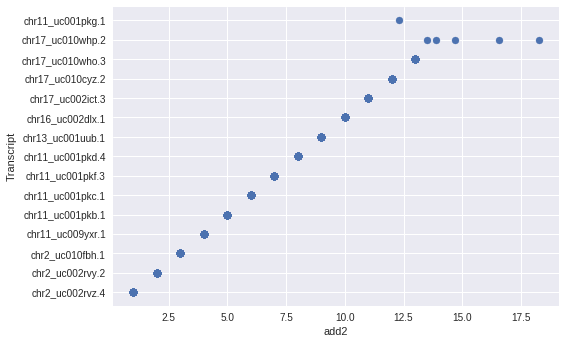

In [0]:
plt.scatter(datos['add2'],datos['transcript'])
plt.xlabel('add2')
plt.ylabel('Transcript')

Veo la relacion entre *transcript* y *add3*
    
    Hay varios grupos bien distinguidos, y observando detenidamente los labels, veo que hay relacion entre el prefijo de *transcript*, ie. **chXX**, y *add3*
 

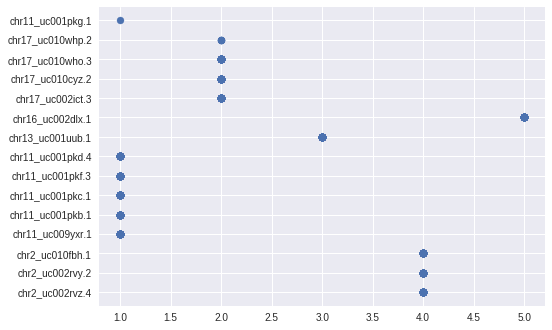

In [0]:
plt.scatter(datos['add3'],datos['transcript'])

Del grafico de *TPM* vs *Transcript*, veo que hay distintos cumulos para cada *transcript*. Analizo para uno solo, realizando un histograma del *TPM*

In [0]:
chr2 = datos.loc[datos['transcript']=='chr2_uc002rvz.4',['add1','TPM']]
chr2.head()

,add1,TPM
0,1,157157.03
13,2,156944.16
26,3,157495.56
39,4,158377.30
52,5,134088.59


(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  3.,  5.,  5.,  9.,  8.,  3.,  0.,  3.,  3.,  9., 13., 16.,
        14.,  2.,  0.,  1.]),
 array([ 90536.17 ,  93198.108,  95860.046,  98521.984, 101183.922,
        103845.86 , 106507.798, 109169.736, 111831.674, 114493.612,
        117155.55 , 119817.488, 122479.426, 125141.364, 127803.302,
        130465.24 , 133127.178, 135789.116, 138451.054, 141112.992,
        143774.93 , 146436.868, 149098.806, 151760.744, 154422.682,
        157084.62 , 159746.558, 162408.496, 165070.434, 167732.372,
        170394.31 ]),
 <a list of 30 Patch objects>)

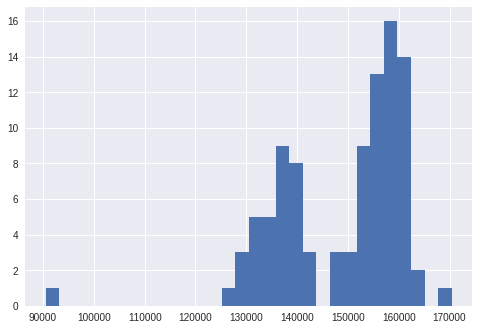

In [0]:
plt.hist(chr2['TPM'],bins=30)

Dado que hay una distribucion clara, trato re reproducir lo mismo para todas las clases.

In [0]:
# !pip install -qU joypy
import joypy

/usr/local/lib/python3.6/dist-packages/joypy/joyplot.py:222: UserWarning: At least a column/group has no numeric values.
  warn("At least a column/group has no numeric values.")


(<Figure size 576x396 with 16 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7efd3334e0f0>])

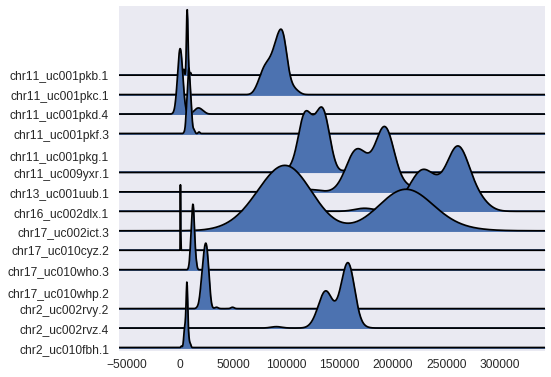

In [0]:
joypy.joyplot(datos[['TPM','transcript']],by='transcript',ylim='own')

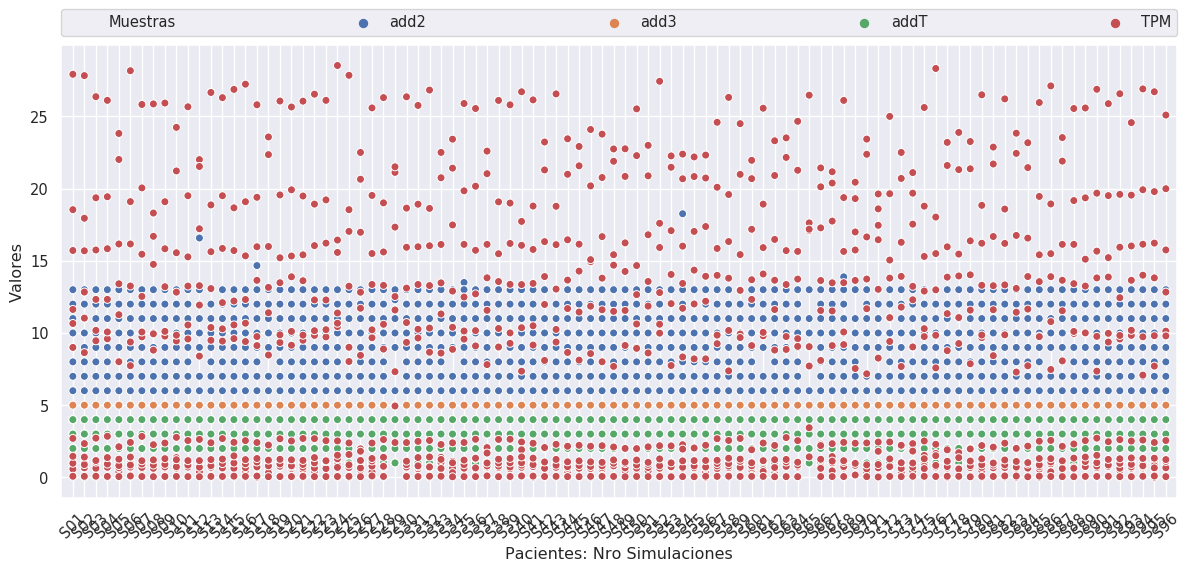

In [0]:
## Analisis 2

# !pip install -qU seaborn #en version 0.7.1 no hay scatterplot
# !cp prueba-transcriptos-01.txt scater_dataOK_revisado.txt
# %run 003-scatter.py

In [0]:
import altair as alt
alt.__version__
datos.columns

Index(['sampleID', 'add1', 'transcript', 'add2', 'TPM', 'add3'], dtype='object')

In [0]:
base = alt.Chart(datos)

In [0]:
puntos = base.mark_circle().encode(x='sampleID:N',
                        y='transcript:N',
                        size='sum(TPM)',
                        color='add3:N'
                        )
barras_arriba = base.mark_bar().encode(x='sampleID:N'
                                     ,y='sum(TPM)'
                                     ,color='add3:N'
                                    )

barras_derecha = base.mark_bar().encode(x='sum(TPM)'
                                     ,y='transcript:N'
                                     ,color='add3:N'
                                    )

barras_arriba & ( puntos | barras_derecha )

VConcatChart({
  vconcat: [Chart({
    data:      sampleID  add1        transcript  add2        TPM  add3
    0         S01     1   chr2_uc002rvz.4   1.0  157157.03     4
    1         S01     1   chr2_uc002rvy.2   2.0   26983.21     4
    2         S01     1   chr2_uc010fbh.1   3.0    6902.84     4
    3         S01     1  chr11_uc009yxr.1   4.0  116319.04     1
    4         S01     1  chr11_uc001pkb.1   5.0    5799.09     1
    5         S01     1  chr11_uc001pkc.1   6.0   90011.22     1
    6         S01     1  chr11_uc001pkf.3   7.0    9798.20     1
    7         S01     1  chr11_uc001pkd.4   8.0     403.22     1
    8         S01     1  chr13_uc001uub.1   9.0  185431.89     3
    9         S01     1  chr16_uc002dlx.1  10.0  279214.06     5
    10        S01     1  chr17_uc002ict.3  11.0  106590.91     2
    11        S01     1  chr17_uc010cyz.2  12.0     774.03     2
    12        S01     1  chr17_uc010who.3  13.0   14615.28     2
    13        S02     2   chr2_uc002rvz.4   1.0  156944.16     4
    14        S02     2   chr2_uc002rvy.2   2.0   23379.36     4
    15        S02     2   chr2_uc010fbh.1   3.0    6357.67     4
    16        S02     2  chr11_uc009yxr.1   4.0  128360.01     1
    17        S02     2  chr11_uc001pkb.1   5.0    6642.85     1
    18        S02     2  chr11_uc001pkc.1   6.0   86399.52     1
    19        S02     2  chr11_uc001pkf.3   7.0    8860.23     1
    20        S02     2  chr11_uc001pkd.4   8.0     191.97     1
    21        S02     2  chr13_uc001uub.1   9.0  179493.86     3
    22        S02     2  chr16_uc002dlx.1  10.0  278293.91     5
    23        S02     2  chr17_uc002ict.3  11.0  110325.91     2
    24        S02     2  chr17_uc010cyz.2  12.0     703.08     2
    25        S02     2  chr17_uc010who.3  13.0   14047.47     2
    26        S03     3   chr2_uc002rvz.4   1.0  157495.56     4
    27        S03     3   chr2_uc002rvy.2   2.0   27162.59     4
    28        S03     3   chr2_uc010fbh.1   3.0    8709.34     4
    29        S03     3  chr11_uc009yxr.1   4.0  123303.06     1
    ...       ...   ...               ...   ...        ...   ...
    1206      S94    94  chr16_uc002dlx.1  10.0  269069.09     5
    1207      S94    94  chr17_uc002ict.3  11.0   70828.27     2
    1208      S94    94  chr17_uc010cyz.2  12.0     727.04     2
    1209      S94    94  chr17_uc010who.3  13.0   13106.67     2
    1210      S95    95   chr2_uc002rvz.4   1.0  162269.03     4
    1211      S95    95   chr2_uc002rvy.2   2.0   24163.46     4
    1212      S95    95   chr2_uc010fbh.1   3.0    6157.13     4
    1213      S95    95  chr11_uc009yxr.1   4.0  138182.27     1
    1214      S95    95  chr11_uc001pkb.1   5.0    8126.68     1
    1215      S95    95  chr11_uc001pkc.1   6.0   98125.14     1
    1216      S95    95  chr11_uc001pkf.3   7.0    6575.74     1
    1217      S95    95  chr11_uc001pkd.4   8.0      86.58     1
    1218      S95    95  chr13_uc001uub.1   9.0  197933.70     3
    1219      S95    95  chr16_uc002dlx.1  10.0  267103.47     5
    1220      S95    95  chr17_uc002ict.3  11.0   77065.23     2
    1221      S95    95  chr17_uc010cyz.2  12.0     938.14     2
    1222      S95    95  chr17_uc010who.3  13.0   13273.41     2
    1223      S96    96   chr2_uc002rvz.4   1.0  157522.27     4
    1224      S96    96   chr2_uc002rvy.2   2.0   25519.46     4
    1225      S96    96   chr2_uc010fbh.1   3.0    7772.57     4
    1226      S96    96  chr11_uc009yxr.1   4.0  128327.55     1
    1227      S96    96  chr11_uc001pkb.1   5.0    6654.31     1
    1228      S96    96  chr11_uc001pkc.1   6.0  101289.81     1
    1229      S96    96  chr11_uc001pkf.3   7.0   11060.86     1
    1230      S96    96  chr11_uc001pkd.4   8.0     119.80     1
    1231      S96    96  chr13_uc001uub.1   9.0  199946.70     3
    1232      S96    96  chr16_uc002dlx.1  10.0  250979.02     5
    1233      S96    96  chr17_uc002ict.3  11.0   97977.56     2
    1234      S96    96  chr17_uc010cyz.2  12.0     514.18 

In [0]:
puntos2 = base.mark_circle().encode(x='sampleID:N',
                        y='add3:N',
                        size='sum(TPM)',
                        color='add3:N'
                        )
barras_arriba2 = base.mark_bar().encode(x='sampleID:N'
                                     ,y='sum(TPM)'
                                     ,color='add3:N'
                                    )

barras_derecha2 = base.mark_bar().encode(x='sum(TPM)'
                                     ,y='add3:N'
                                     ,color='add3:N'
                                    )

barras_arriba2 & ( puntos2 | barras_derecha2 )

VConcatChart({
  vconcat: [Chart({
    data:      sampleID  add1        transcript  add2        TPM  add3
    0         S01     1   chr2_uc002rvz.4   1.0  157157.03     4
    1         S01     1   chr2_uc002rvy.2   2.0   26983.21     4
    2         S01     1   chr2_uc010fbh.1   3.0    6902.84     4
    3         S01     1  chr11_uc009yxr.1   4.0  116319.04     1
    4         S01     1  chr11_uc001pkb.1   5.0    5799.09     1
    5         S01     1  chr11_uc001pkc.1   6.0   90011.22     1
    6         S01     1  chr11_uc001pkf.3   7.0    9798.20     1
    7         S01     1  chr11_uc001pkd.4   8.0     403.22     1
    8         S01     1  chr13_uc001uub.1   9.0  185431.89     3
    9         S01     1  chr16_uc002dlx.1  10.0  279214.06     5
    10        S01     1  chr17_uc002ict.3  11.0  106590.91     2
    11        S01     1  chr17_uc010cyz.2  12.0     774.03     2
    12        S01     1  chr17_uc010who.3  13.0   14615.28     2
    13        S02     2   chr2_uc002rvz.4   1.0  156944.16     4
    14        S02     2   chr2_uc002rvy.2   2.0   23379.36     4
    15        S02     2   chr2_uc010fbh.1   3.0    6357.67     4
    16        S02     2  chr11_uc009yxr.1   4.0  128360.01     1
    17        S02     2  chr11_uc001pkb.1   5.0    6642.85     1
    18        S02     2  chr11_uc001pkc.1   6.0   86399.52     1
    19        S02     2  chr11_uc001pkf.3   7.0    8860.23     1
    20        S02     2  chr11_uc001pkd.4   8.0     191.97     1
    21        S02     2  chr13_uc001uub.1   9.0  179493.86     3
    22        S02     2  chr16_uc002dlx.1  10.0  278293.91     5
    23        S02     2  chr17_uc002ict.3  11.0  110325.91     2
    24        S02     2  chr17_uc010cyz.2  12.0     703.08     2
    25        S02     2  chr17_uc010who.3  13.0   14047.47     2
    26        S03     3   chr2_uc002rvz.4   1.0  157495.56     4
    27        S03     3   chr2_uc002rvy.2   2.0   27162.59     4
    28        S03     3   chr2_uc010fbh.1   3.0    8709.34     4
    29        S03     3  chr11_uc009yxr.1   4.0  123303.06     1
    ...       ...   ...               ...   ...        ...   ...
    1206      S94    94  chr16_uc002dlx.1  10.0  269069.09     5
    1207      S94    94  chr17_uc002ict.3  11.0   70828.27     2
    1208      S94    94  chr17_uc010cyz.2  12.0     727.04     2
    1209      S94    94  chr17_uc010who.3  13.0   13106.67     2
    1210      S95    95   chr2_uc002rvz.4   1.0  162269.03     4
    1211      S95    95   chr2_uc002rvy.2   2.0   24163.46     4
    1212      S95    95   chr2_uc010fbh.1   3.0    6157.13     4
    1213      S95    95  chr11_uc009yxr.1   4.0  138182.27     1
    1214      S95    95  chr11_uc001pkb.1   5.0    8126.68     1
    1215      S95    95  chr11_uc001pkc.1   6.0   98125.14     1
    1216      S95    95  chr11_uc001pkf.3   7.0    6575.74     1
    1217      S95    95  chr11_uc001pkd.4   8.0      86.58     1
    1218      S95    95  chr13_uc001uub.1   9.0  197933.70     3
    1219      S95    95  chr16_uc002dlx.1  10.0  267103.47     5
    1220      S95    95  chr17_uc002ict.3  11.0   77065.23     2
    1221      S95    95  chr17_uc010cyz.2  12.0     938.14     2
    1222      S95    95  chr17_uc010who.3  13.0   13273.41     2
    1223      S96    96   chr2_uc002rvz.4   1.0  157522.27     4
    1224      S96    96   chr2_uc002rvy.2   2.0   25519.46     4
    1225      S96    96   chr2_uc010fbh.1   3.0    7772.57     4
    1226      S96    96  chr11_uc009yxr.1   4.0  128327.55     1
    1227      S96    96  chr11_uc001pkb.1   5.0    6654.31     1
    1228      S96    96  chr11_uc001pkc.1   6.0  101289.81     1
    1229      S96    96  chr11_uc001pkf.3   7.0   11060.86     1
    1230      S96    96  chr11_uc001pkd.4   8.0     119.80     1
    1231      S96    96  chr13_uc001uub.1   9.0  199946.70     3
    1232      S96    96  chr16_uc002dlx.1  10.0  250979.02     5
    1233      S96    96  chr17_uc002ict.3  11.0   97977.56     2
    1234      S96    96  chr17_uc010cyz.2  12.0     514.18 